In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import master_ROCKE3D as mr

from netCDF4 import Dataset

# Testing open_rocke

In [2]:
# Import data
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
data = Dataset(path + 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc','r')
print(data.variables)

lat = np.array(data['lat'])
lon = np.array(data['lon'])
t_500 = np.array(data['t_500'])

{'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
unlimited dimensions: 
current shape = (46,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'axyp': <class 'netCDF4._netCDF4.Variable'>
float32 axyp(lat, lon)
    units: m^2
    long_name: gridcell area
unlimited dimensions: 
current shape = (46, 72)
filling on, default _FillValue of 9.969209968386869e+36 used, 'oicefr': <class 'netCDF4._netCDF4.Variable'>
float32 oicefr(lat, lon)
    units: %
    long_name: OCEAN/LAKE ICE COVERAGE
unlimited dimensions: 
current shape = (46, 72)
filling on, default _FillValue of 9.969209968386869e+36 used, 'oicefr_hemis': <class 'netCDF4._netCDF4.Variable'>
float32 oicefr_hemis(shnhgm)
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.9

In [3]:
data['t_500'].long_name

'TEMPERATURE AT 500mb'

In [4]:
lonGrid, latGrid = np.meshgrid(lon, lat)

Text(0.5, 1.0, 'TEMPERATURE AT 500mb')

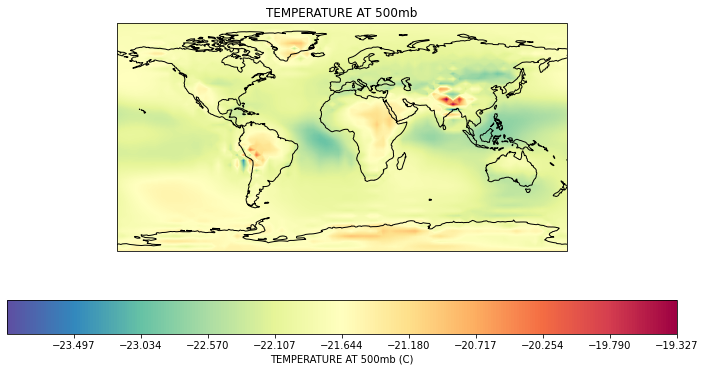

In [5]:
# Plot data on with lat on x-axis and lon on y-axis
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, t_500, levels=np.linspace(np.min(t_500), np.max(t_500),1000), cmap='Spectral_r')
fig.colorbar(c1,label=(data['t_500'].long_name +' ('+ data['t_500'].units+')'), orientation='horizontal')
ax.coastlines()

ax.set_title(data['t_500'].long_name)

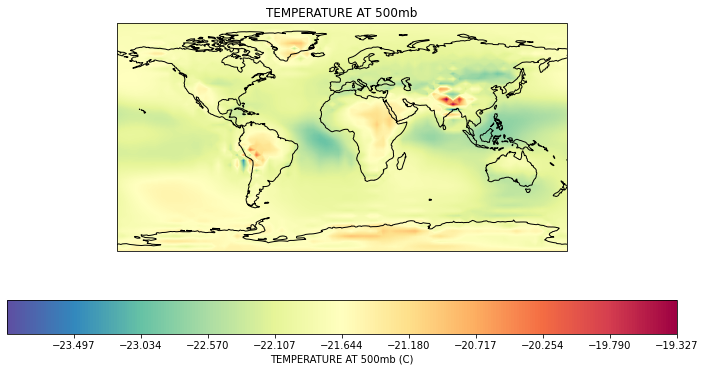

In [6]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
filename = 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc'
var = 't_500'

tsurf, lat, lon = mr.open_ROCKE3D(path, filename, var)

# Testing diff_rocke

Text(0.5, 1.0, 'TEMPERATURE AT 500mb DIFFERENCE')

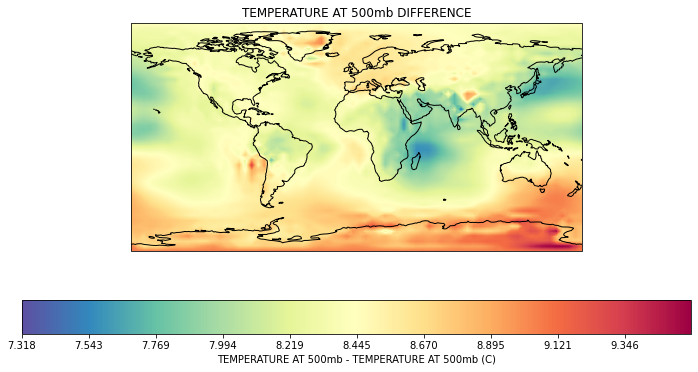

In [7]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
file1 = 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc'
file2 = 'amANN0990-0999.aijP212eoDOFP3Od_X064_O30.nc'
var = 't_500'

data1 = Dataset(path + file1,'r')
data2 = Dataset(path + file2,'r')

lat = np.array(data1['lat'])
lon = np.array(data1['lon'])
lonGrid, latGrid = np.meshgrid(lon, lat)

var1 = np.array(data1['t_500'])
var2 = np.array(data2['t_500'])
var_diff = var2 - var1

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, var_diff, levels=np.linspace(np.min(var_diff), np.max(var_diff),1000), cmap='Spectral_r')
fig.colorbar(c1,label=(data2['t_500'].long_name+' - '+data1['t_500'].long_name+
                       ' ('+ data1['t_500'].units+')'), orientation="horizontal")
ax.coastlines()

ax.set_title(data1['t_500'].long_name+' DIFFERENCE')

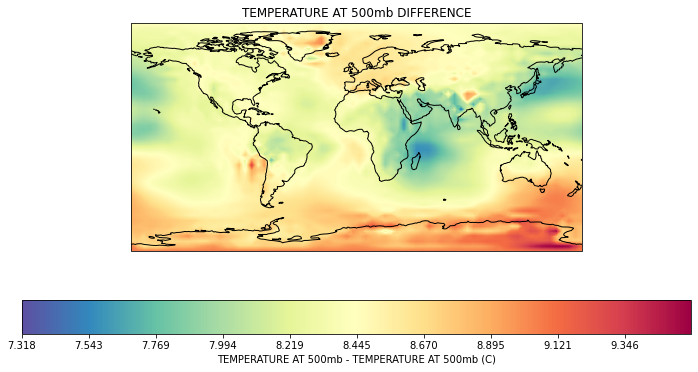

In [9]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
file1 = 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc'
file2 = 'amANN0990-0999.aijP212eoDOFP3Od_X064_O30.nc'
var = 't_500'

mr.diff_ROCKE3D(path,file1,file2,var)